<a href="https://colab.research.google.com/github/matwirabc/binaproject/blob/aggregate/bina_aggregate_250601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobilitätsanalyse Schweiz (2013 - 2024)


---
**Datum:** 01.06.2025; **Modul:** BINA; Semesterarbeit 2025

---



Die Verarbeitung und Darstellung der Daten erfolgt mit den Libarys, welche in einem ersten Schritt importiert werden.

In [72]:
#Load necessary packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import matplotlib.ticker as mticker
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import warnings
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
files.upload()
from IPython.display import display, Image, Markdown
!pip install dash
!pip install mplcursors


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Dataset_250601.png to Dataset_250601.png


#1. Einleitung
Vor dem Hintergrund zunehmender klimapolitischer Zielsetzungen und technologischer Umbrüche im Mobilitätssektor untersucht diese Arbeit die Entwicklungen verschiedener Verkehrsträger in Relation zur Bevölkerungsentwicklung der Schweiz.

##1.1 Vorgehen
Die Arbeit ist nach dem "Five-Step Approach" nach CPA (Chartered Professional Accountants) gegliedert. Das Vorgehen ist:


1.   Schritt:   Ziel(e) setzen
2.   Schritt:   Datenerhebung
3.   Schritt:   Analyse
4.   Schritt:   Aufarbeiten
5.   Schritt:   Entscheiden

##1.2 Ausgangslage
Die Grundlage für diesen Abschnitt bilden die von den Gruppenmitgliedern zuvor bearbeiteten Datensätze. Diese stammten aus unterschiedlichen Quellen und standen bislang in keinem Zusammenhang. Zur weiteren Untersuchung sollen die bearbeiteten Datensätze nun miteinander in Beziehung gesetzt werden. Der Datensatz zur schweizer Wohnbevölkerung fungiert als normierendes Bezugssystem zur Herstellung zeitlicher und quantitativer Vergleichbarkeit zwischen den Verkehrsträgern.
Die Daten können aufgrund ihrer Grösse nicht ohne ein LFS (Large Files System) auf github im Repository gespeichert werden. Diese sind daher auf dem Google Drive unter folgendem Link aufrufbar:

[Google Drive Data Set](https://drive.google.com/drive/u/0/folders/1H15a5yCV3SbFoCDx3HKWT5H659LAg4On)


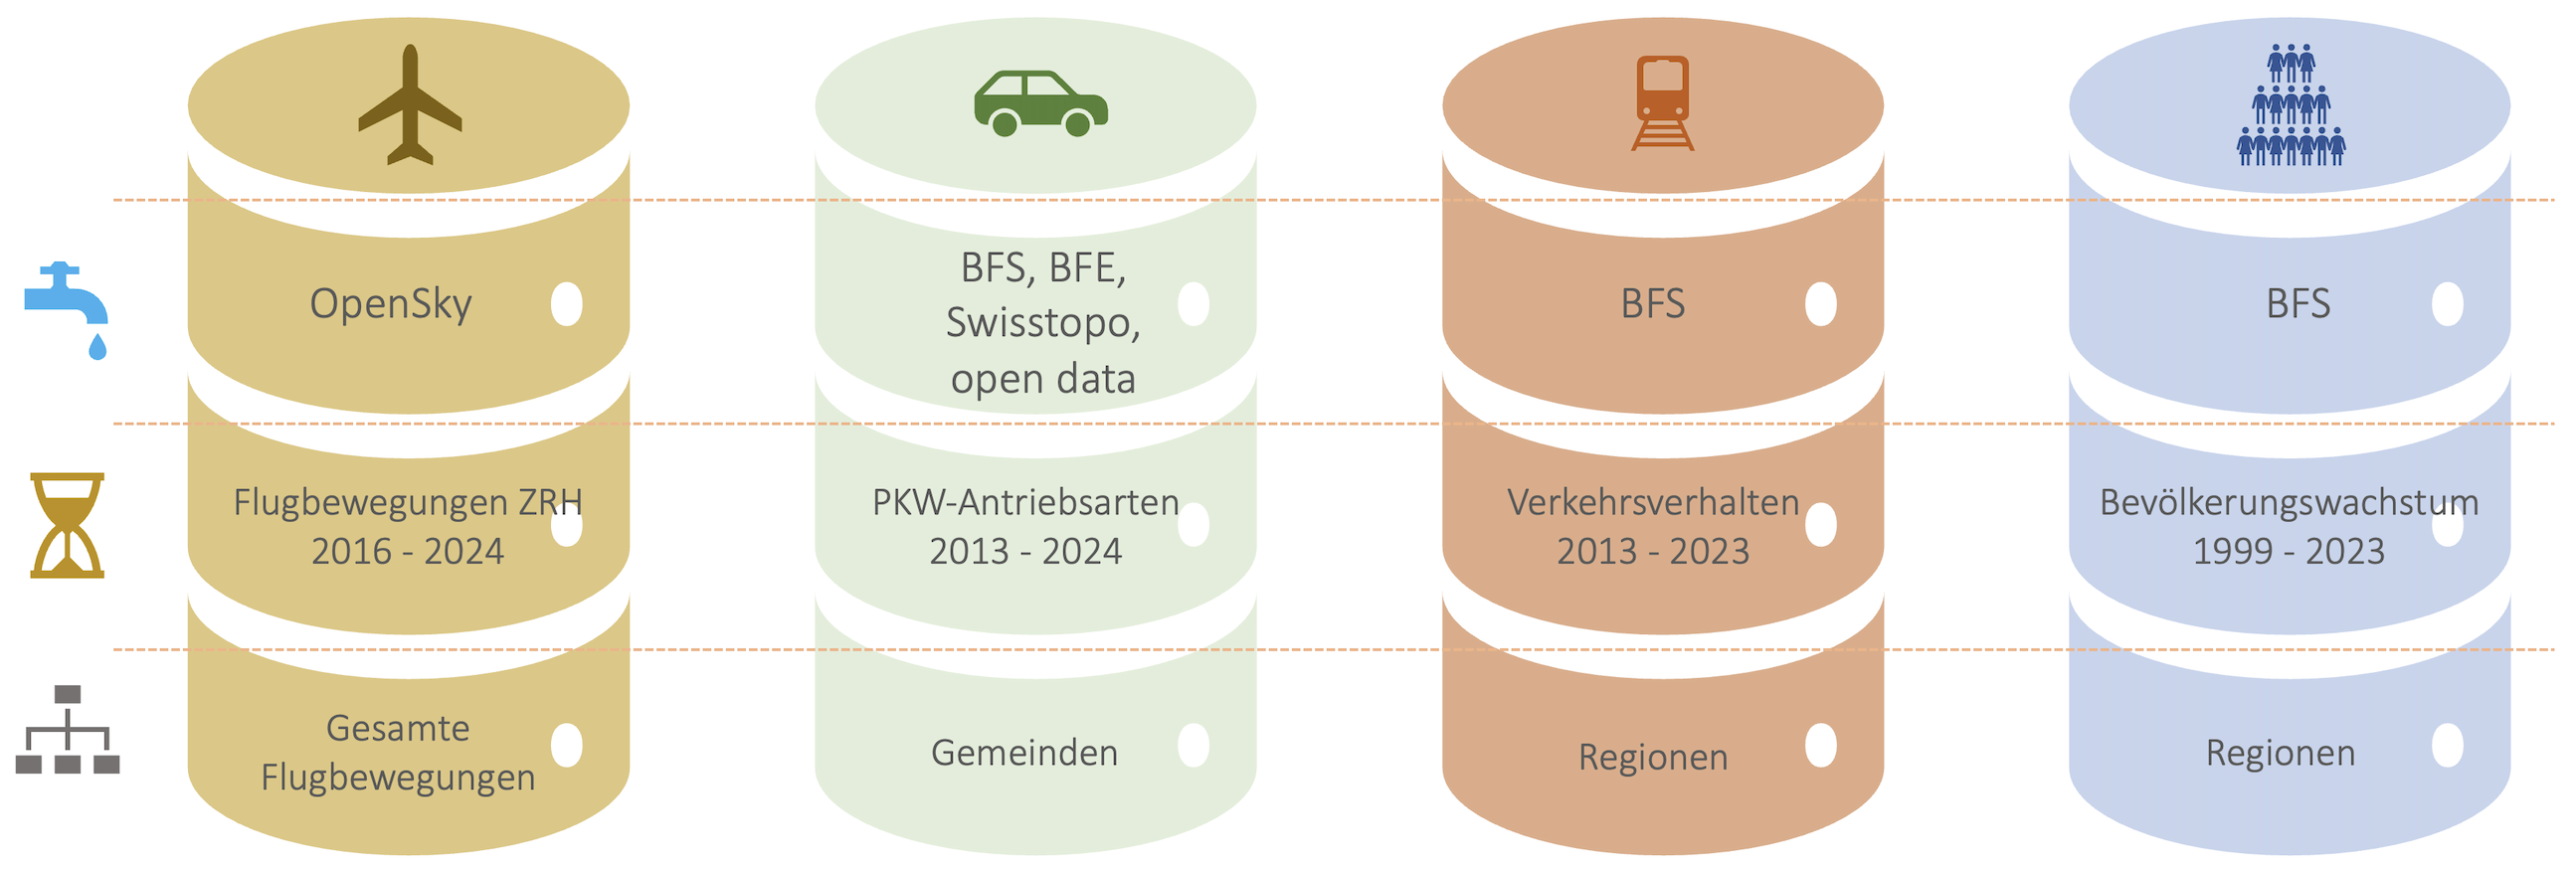

**Abbildung 1:** Verwendete Datensätze

In [74]:
display(Image ("Dataset_250601.png"))
display(Markdown("**Abbildung 1:** Verwendete Datensätze"))

# Schritt 1: Zielsetzung
Folgende Fragen sollen in der Arbeit bearbeitet und beantwortet werden.

**Hauptfrage:**
Wie hat sich die Mobilität in der Schweiz im Zeitraum von 2013 bis 2023 pro 1.000 Einwohner entwickelt?

**Unterfrage 1**
Welcher alternative Antrieb verzeichnete im Verhältnis zur Bevölkerung das stärkste Wachstum zwischen 2013 und 2023?

**Unterfrage 2**
Welche Auswirkungen hatte die Corona-Pandemie auf das Mobilitätsverhalten in der Luftfahrt – gemessen an Flugbewegungen pro 1.000 Einwohner?

**Unterfrage 3**
Wie stark sank der Anteil konventionell betriebener Fahrzeuge in Relation zum Bevölkerungswachstum?

**Unterfrage 4**
Welche Rückschlüsse lassen sich aus diesen Entwicklungen für eine nachhaltige Mobilitätsstrategie in der Schweiz ziehen?


# Schritt 2: Datenerhebung
Die Datenerhebung erfolgte auf Basis öffentlich zugänglicher, aggregierter Statistiken und umfasst die jährlichen Werte zu alternativen Antriebsarten sowie Flugbewegungen im Zeitraum von 2013 bis 2024.


##2.2 Laden der Datensets
Die Datensets wurden in verschiedenen Formaten (.csv und .xlsx) zur Verfügung gestellt.

###2.2.1 Laden der .csv Daten

In [34]:
# Load Data
df_car = pd.read_csv("/content/drive/MyDrive/Dataset_BINA_250601/Cars.csv",
                sep=';',
                encoding='latin-1',
                quotechar='"')
df_plane = pd.read_csv("/content/drive/MyDrive/Dataset_BINA_250601/Planes.csv",
                sep=',',
                parse_dates=['firstseen', 'lastseen'])
df_railway = pd.read_csv("/content/drive/MyDrive/Dataset_BINA_250601/Railway.csv",
                sep=',',
                encoding='utf-8')

### 2.2.2 Laden der .xlsx Daten
Da das Excel aus mehreren "Sheets" bestehen, soll nicht nur das erste sondern alle Sheets geladen werden.

In [6]:
# Load all sheets  as dictionary by function sheet_name = None
df_population = pd.read_excel("/content/drive/MyDrive/Dataset_BINA/Population.xlsx",
                              sheet_name = None,
                              header = 5)
#ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""C

###2.2.3 Prüfen der importierten Daten
Um zu prüfen, ob die Daten korrekt geladen wurden wird jeder Datensatz mittels df_Datensatz.head() aufgerufen. Dadurch werden die ersten fünf Zeilen des Datensatzes dargestellt.

In [15]:
df_car.head()

,Gemeinde,Fahrzeuggruppe,Treibstoff,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Gemeinde_ID,BFS-Nr,Kantonskuerzel
0,Aeugst am Albis,Personenwagen,Benzin,881,856,845,822,815,816,809,804,789,778,774,724,1,1.0,ZH
1,Aeugst am Albis,Personenwagen,Diesel,250,276,288,306,316,318,326,329,321,311,292,287,1,1.0,ZH
2,Aeugst am Albis,Personenwagen,Benzin-elektrisch: Normal-Hybrid,11,13,13,18,16,20,22,30,43,49,57,74,1,1.0,ZH
3,Aeugst am Albis,Personenwagen,Benzin-elektrisch: Plug-in-Hybrid,0,0,0,1,2,7,7,12,20,23,26,29,1,1.0,ZH
4,Aeugst am Albis,Personenwagen,Diesel-elektrisch: Normal-Hybrid,1,0,0,0,2,2,3,2,5,5,7,4,1,1.0,ZH


In [16]:
df_plane.head()

,icao24,firstseen,departure_airport,lastseen,arrival_airport,callsign,query_airport,flight_type,network_duration_minutes,airline_code,locality
0,3c942d,2016-03-03 09:17:57+00:00,LSZH,2016-03-03 09:27:59+00:00,EDNY,DBEAM,LSZH,Departure,10.033333,DBE,International
1,4b1613,2016-03-03 20:14:39+00:00,LSZH,2016-03-03 21:31:36+00:00,EGLW,SWR24A,LSZH,Departure,76.950000,SWR,International
2,4407da,2016-03-03 18:10:16+00:00,LSZH,2016-03-03 19:00:56+00:00,LOAV,NLY8611,LSZH,Departure,50.666667,NLY,International
3,400aff,2016-03-03 19:14:16+00:00,LSZH,2016-03-03 20:36:55+00:00,EGLW,BAW719,LSZH,Departure,82.650000,BAW,International
4,4407f3,2016-03-03 20:38:48+00:00,LSZH,2016-03-03 21:30:29+00:00,LOAN,NLY115E,LSZH,Departure,51.683333,NLY,International


In [35]:
df_railway.head()

,Year,Kanton,Anzahl Bahnhofbenutzer,Generalabonnement,Halbtaxabonnement
0,2019,BE,330300,209602,836766
1,2022,BE,275700,176788,891120
2,2018,BE,303300,208478,805307
3,2023,BE,280600,181069,933787
4,2016,VD,148700,55204,322047


In [18]:
#Show first five rows of each sheet
for df_population, df in df_population.items():
    print(f"\n--- Sheet: {df_population} ---")
    display(df.head())


--- Sheet: 2023 ---


,Schweiz,8962258,1788440,5443532,1730286,4451532,4510726,6544970,2417288,4127991,3615921,403261,797858,733,11722,4018,5643707,1962454,1356097
0,Genferseeregion,1736124.0,365836.0,1066594.0,303694.0,851611.0,884513.0,1140993.0,595131.0,842801.0,654392.0,72185.0,162605.0,235.0,2750.0,926.0,1200494.0,370335.0,165295.0
1,Waadt,845870.0,184231.0,519663.0,141976.0,415697.0,430173.0,561410.0,284460.0,418325.0,315182.0,33595.0,76804.0,90.0,1292.0,444.0,521241.0,236125.0,88504.0
2,Wallis,365844.0,70577.0,219937.0,75330.0,182413.0,183431.0,273857.0,91987.0,163137.0,149547.0,18664.0,33968.0,44.0,310.0,114.0,201600.0,87453.0,76791.0
3,Genf,524410.0,111028.0,326994.0,86388.0,253501.0,270909.0,305726.0,218684.0,261339.0,189663.0,19926.0,51833.0,101.0,1148.0,368.0,477653.0,46757.0,0.0
4,Espace Mittelland,1944753.0,385379.0,1154922.0,404452.0,961157.0,983596.0,1538772.0,405981.0,881538.0,784279.0,95409.0,180496.0,145.0,2007.0,737.0,973102.0,519662.0,451989.0



--- Sheet: 2022 ---


,Schweiz,8815385,1755213,5368549,1691623,4379953,4435432,6519362,2296023,4024051,3589295,402798,780357,647,14293,3682,5547579,1932177,1335629
0,Genferseeregion,1701827.0,358186.0,1046653.0,296988.0,835051.0,866776.0,1130600.0,571227.0,816952.0,649510.0,72194.0,158686.0,228.0,3360.0,849.0,1176727.0,363754.0,161346.0
1,Waadt,830431.0,180828.0,510764.0,138839.0,408209.0,422222.0,554772.0,275659.0,405980.0,313352.0,33611.0,75333.0,83.0,1646.0,405.0,511867.0,232420.0,86144.0
2,Wallis,357282.0,68941.0,215062.0,73279.0,177835.0,179447.0,272671.0,84611.0,157310.0,148115.0,18653.0,32679.0,38.0,373.0,100.0,196906.0,85174.0,75202.0
3,Genf,514114.0,108417.0,320827.0,84870.0,249007.0,265107.0,303157.0,210957.0,253662.0,188043.0,19930.0,50674.0,107.0,1341.0,344.0,467954.0,46160.0,0.0
4,Espace Mittelland,1918746.0,379054.0,1144199.0,395493.0,948765.0,969981.0,1536189.0,382557.0,862111.0,781413.0,95513.0,176418.0,121.0,2438.0,678.0,958079.0,513602.0,447065.0



--- Sheet: 2021 ---


,Schweiz,8738791,1742898,5334574,1661319,4338203,4400588,6494610,2244181,3963699,3580260,403549,767336,636,19705,3343,5497342,1908838,1332611
0,Genferseeregion,1685625.0,355581.0,1037507.0,292537.0,826704.0,858921.0,1124459.0,561166.0,802549.0,649059.0,72504.0,156154.0,210.0,4310.0,789.0,1165784.0,359974.0,159867.0
1,Waadt,822968.0,179789.0,506501.0,136678.0,404311.0,418657.0,550447.0,272521.0,399014.0,313418.0,33901.0,74074.0,77.0,2076.0,386.0,506885.0,230723.0,85360.0
2,Wallis,353209.0,68414.0,213030.0,71765.0,175475.0,177734.0,271208.0,82001.0,154332.0,147735.0,18537.0,31922.0,31.0,554.0,83.0,194781.0,83921.0,74507.0
3,Genf,509448.0,107378.0,317976.0,84094.0,246918.0,262530.0,302804.0,206644.0,249203.0,187906.0,20066.0,50158.0,102.0,1680.0,320.0,464118.0,45330.0,0.0
4,Espace Mittelland,1907491.0,377165.0,1141731.0,388595.0,942630.0,964861.0,1532757.0,374734.0,851601.0,782070.0,96071.0,173602.0,125.0,3347.0,620.0,952809.0,509515.0,445167.0



--- Sheet: 2020 ---


,Schweiz,8670300,1726301,5314329,1629670,4302599,4367701,6459512,2210788,3903333,3588894,403471,751735,617,19022,2981,5459871,1892586,1317843
0,Genferseeregion,1669608.0,352457.0,1029714.0,287437.0,818492.0,851116.0,1115756.0,553852.0,786918.0,652560.0,72456.0,152562.0,197.0,4166.0,693.0,1154478.0,357221.0,157909.0
1,Waadt,814762.0,178201.0,502049.0,134512.0,400217.0,414545.0,544045.0,270717.0,390456.0,315488.0,33856.0,72495.0,74.0,2046.0,322.0,502562.0,227934.0,84266.0
2,Wallis,348503.0,67768.0,210723.0,70012.0,172955.0,175548.0,268980.0,79523.0,150781.0,147805.0,18447.0,30828.0,32.0,514.0,80.0,190528.0,84332.0,73643.0
3,Genf,506343.0,106488.0,316942.0,82913.0,245320.0,261023.0,302731.0,203612.0,245681.0,189267.0,20153.0,49239.0,91.0,1606.0,291.0,461388.0,44955.0,0.0
4,Espace Mittelland,1895693.0,374276.0,1140813.0,380604.0,936569.0,959124.0,1526914.0,368779.0,840219.0,785146.0,96427.0,169945.0,118.0,3232.0,550.0,947795.0,508274.0,439624.0



--- Sheet: 2019 ---


,Schweiz,8606033,1717198,5283035,1605800,4268863,4337170,6430658,2175375,3843439,3599225,404591,737094,596,18231,2606,5422227,1874960,1308846
0,Genferseeregion,1654751.0,350184.0,1019602.0,284965.0,810627.0,844124.0,1109609.0,545142.0,769856.0,657991.0,72804.0,149287.0,179.0,3995.0,588.0,1145994.0,352393.0,156364.0
1,Waadt,805098.0,176324.0,495399.0,133375.0,395189.0,409909.0,539414.0,265684.0,379802.0,317927.0,34103.0,70898.0,63.0,1998.0,283.0,496862.0,224782.0,83454.0
2,Wallis,345525.0,67783.0,208907.0,68835.0,171254.0,174271.0,267503.0,78022.0,148368.0,148410.0,18435.0,29759.0,32.0,436.0,69.0,189532.0,83083.0,72910.0
3,Genf,504128.0,106077.0,315296.0,82755.0,244184.0,259944.0,302692.0,201436.0,241686.0,191654.0,20266.0,48630.0,84.0,1561.0,236.0,459600.0,44528.0,0.0
4,Espace Mittelland,1886584.0,373779.0,1138042.0,374763.0,931877.0,954707.0,1522281.0,364303.0,830318.0,789245.0,96969.0,166289.0,109.0,3103.0,495.0,944887.0,503734.0,437963.0



--- Sheet: 2018 ---


,Schweiz,8544527,1709458,5257768,1577301,4237121,4307406,6396252,2148275,3797529,3597800,405348,723331,598,17392,2305,5380353,1861193,1302981
0,Genferseeregion,1642580.0,349186.0,1012587.0,280807.0,804808.0,837772.0,1099297.0,543283.0,758587.0,660079.0,72910.0,146485.0,171.0,3775.0,522.0,1137812.0,348868.0,155900.0
1,Waadt,799145.0,175670.0,492075.0,131400.0,392529.0,406616.0,533878.0,265267.0,374074.0,319150.0,34214.0,69485.0,60.0,1892.0,247.0,493915.0,222272.0,82958.0
2,Wallis,343955.0,68005.0,208500.0,67450.0,170431.0,173524.0,265879.0,78076.0,147060.0,149070.0,18370.0,28941.0,33.0,408.0,56.0,188756.0,82257.0,72942.0
3,Genf,499480.0,105511.0,312012.0,81957.0,241848.0,257632.0,299540.0,199940.0,237453.0,191859.0,20326.0,48059.0,78.0,1475.0,219.0,455141.0,44339.0,0.0
4,Espace Mittelland,1877154.0,373098.0,1136002.0,368054.0,926783.0,950371.0,1518454.0,358700.0,822245.0,790588.0,97441.0,163311.0,113.0,2955.0,460.0,940874.0,499938.0,436342.0



--- Sheet: 2017 ---


,Schweiz,8484130,1700494,5233271,1550365,4206434,4277696,6357738,2126392,3755372,3592368,406117,711025,588,16435,2001,5339043,1852223,1292864
0,Genferseeregion,1629841.0,346875.0,1005903.0,277063.0,798780.0,831061.0,1086874.0,542967.0,747544.0,661155.0,73063.0,143847.0,163.0,3558.0,458.0,1129428.0,344955.0,155458.0
1,Waadt,793129.0,174446.0,488905.0,129778.0,389504.0,403625.0,527117.0,266012.0,368315.0,319792.0,34382.0,68554.0,57.0,1786.0,216.0,491022.0,219482.0,82625.0
2,Wallis,341463.0,67825.0,207639.0,65999.0,169162.0,172301.0,263082.0,78381.0,145510.0,149095.0,18326.0,28051.0,35.0,378.0,52.0,187341.0,81289.0,72833.0
3,Genf,495249.0,104604.0,309359.0,81286.0,240114.0,255135.0,296675.0,198574.0,233719.0,192268.0,20355.0,47242.0,71.0,1394.0,190.0,451065.0,44184.0,0.0
4,Espace Mittelland,1868886.0,372526.0,1134465.0,361895.0,922655.0,946231.0,1514630.0,354256.0,815367.0,791716.0,97906.0,160544.0,123.0,2792.0,386.0,937087.0,501043.0,430756.0



--- Sheet: 2016 ---


,Schweiz,8419550,1691466,5205025,1523059,4173437,4246113,6318404,2101146,3710349,3585129,406983,699200,597,15324,1730,5282707,1837044,1299799
0,Genferseeregion,1613522.0,343884.0,996126.0,273512.0,790573.0,822949.0,1074042.0,539480.0,734396.0,661014.0,73218.0,140988.0,166.0,3292.0,392.0,1107433.0,341044.0,165045.0
1,Waadt,784822.0,172689.0,483842.0,128291.0,385389.0,399433.0,520957.0,263865.0,361457.0,319592.0,34549.0,67313.0,59.0,1639.0,183.0,486030.0,216920.0,81872.0
2,Wallis,339176.0,67739.0,206913.0,64524.0,168072.0,171104.0,260444.0,78732.0,144112.0,149235.0,18259.0,27145.0,37.0,325.0,48.0,175361.0,80642.0,83173.0
3,Genf,489524.0,103456.0,305371.0,80697.0,237112.0,252412.0,292641.0,196883.0,228827.0,192187.0,20410.0,46530.0,70.0,1328.0,161.0,446042.0,43482.0,0.0
4,Espace Mittelland,1859557.0,372064.0,1131995.0,355498.0,917893.0,941664.0,1509290.0,350267.0,807879.0,792454.0,98294.0,157791.0,127.0,2621.0,340.0,932607.0,495907.0,431043.0



--- Sheet: 2015 ---


,Schweiz,8327126,1675503,5156571,1495052,4121471,4205655,6278459,2048667,3650651,3568702,407151,684114,563,14306,1446,5224160,1812583,1290383
0,Genferseeregion,1593839.0,340411.0,984543.0,268885.0,779927.0,813912.0,1059872.0,533967.0,720102.0,659175.0,73197.0,137698.0,146.0,3139.0,331.0,1094617.0,335853.0,163369.0
1,Waadt,773407.0,170633.0,476817.0,125957.0,379074.0,394333.0,513739.0,259668.0,353300.0,318102.0,34604.0,65634.0,51.0,1533.0,159.0,479658.0,213338.0,80411.0
2,Wallis,335696.0,67347.0,205413.0,62936.0,166426.0,169270.0,258612.0,77084.0,142216.0,148810.0,18126.0,26148.0,33.0,312.0,35.0,173187.0,79551.0,82958.0
3,Genf,484736.0,102431.0,302313.0,79992.0,234427.0,250309.0,287521.0,197215.0,224586.0,192263.0,20467.0,45916.0,62.0,1294.0,137.0,441772.0,42964.0,0.0
4,Espace Mittelland,1842251.0,369495.0,1123767.0,348989.0,907412.0,934839.0,1504471.0,337780.0,795493.0,791151.0,98791.0,153932.0,124.0,2446.0,274.0,922226.0,490336.0,429689.0



--- Sheet: 2014 ---


,Schweiz,8237666,1663752,5108349,1465565,4073880,4163786,6239207,1998459,3593986,3551926,407583,669047,549,13282,1132,5168376,1790738,1278552
0,Genferseeregion,1570594.0,336857.0,970056.0,263681.0,768192.0,802402.0,1047506.0,523088.0,703912.0,656094.0,73255.0,134004.0,148.0,2875.0,259.0,1079078.0,329896.0,161620.0
1,Waadt,761446.0,168899.0,468935.0,123612.0,373187.0,388259.0,509124.0,252322.0,344572.0,316709.0,34765.0,63790.0,50.0,1408.0,126.0,473240.0,209112.0,79094.0
2,Wallis,331763.0,67069.0,203445.0,61249.0,164399.0,167364.0,256485.0,75278.0,140038.0,148109.0,18051.0,25211.0,37.0,281.0,22.0,170951.0,78286.0,82526.0
3,Genf,477385.0,100889.0,297676.0,78820.0,230606.0,246779.0,281897.0,195488.0,219302.0,191276.0,20439.0,45003.0,61.0,1186.0,111.0,434887.0,42498.0,0.0
4,Espace Mittelland,1826251.0,368125.0,1115781.0,342345.0,898913.0,927338.0,1499972.0,326279.0,784062.0,790017.0,99053.0,150470.0,117.0,2287.0,212.0,914434.0,485544.0,426273.0



--- Sheet: 2013 ---


,Schweiz,8139631,1653511,5053373,1432747,4022091,4117540,6202184,1937447,3537837,3527929,407667,652608,528,12174,888,5106473,1767144,1266014
0,Genferseeregion,1545817.0,333823.0,954579.0,257415.0,755704.0,790113.0,1037401.0,508416.0,688681.0,650724.0,73017.0,130406.0,134.0,2658.0,197.0,1063222.0,323493.0,159102.0
1,Waadt,749373.0,167283.0,461284.0,120806.0,366766.0,382607.0,503493.0,245880.0,336758.0,314154.0,34782.0,62238.0,44.0,1306.0,91.0,467322.0,204856.0,77195.0
2,Wallis,327011.0,66744.0,201026.0,59241.0,161991.0,165020.0,254273.0,72738.0,137702.0,146860.0,17922.0,24212.0,31.0,269.0,15.0,168248.0,76856.0,81907.0
3,Genf,469433.0,99796.0,292269.0,77368.0,226947.0,242486.0,279635.0,189798.0,214221.0,189710.0,20313.0,43956.0,59.0,1083.0,91.0,427652.0,41781.0,0.0
4,Espace Mittelland,1808480.0,367067.0,1106301.0,335112.0,889319.0,919161.0,1494209.0,314271.0,773418.0,786890.0,99451.0,146344.0,115.0,2090.0,172.0,905581.0,480670.0,422229.0



--- Sheet: 2012 ---


,Schweiz,8039060,1643307,4997135,1398618,3968524,4070536,6169091,1869969,3477652,3507132,407661,634401,502,11057,655,5042728,1742882,1253450
0,Genferseeregion,1519189.0,329582.0,938902.0,250705.0,741999.0,777190.0,1029640.0,489549.0,671776.0,646068.0,72781.0,125884.0,130.0,2415.0,135.0,1046667.0,316316.0,156206.0
1,Waadt,734356.0,164537.0,452075.0,117744.0,358983.0,375373.0,498089.0,236267.0,326830.0,311274.0,34752.0,60211.0,41.0,1193.0,55.0,459415.0,199943.0,74998.0
2,Wallis,321732.0,66135.0,198363.0,57234.0,159279.0,162453.0,252134.0,69598.0,134957.0,145504.0,17768.0,23229.0,31.0,230.0,13.0,165091.0,75433.0,81208.0
3,Genf,463101.0,98910.0,288464.0,75727.0,223737.0,239364.0,279417.0,183684.0,209989.0,189290.0,20261.0,42444.0,58.0,992.0,67.0,422161.0,40940.0,0.0
4,Espace Mittelland,1788791.0,366053.0,1095393.0,327345.0,878397.0,910394.0,1488524.0,300267.0,761169.0,784059.0,99799.0,141629.0,103.0,1920.0,112.0,894765.0,475236.0,418790.0



--- Sheet: 2011 ---


,Schweiz,7954662,1642543,4946967,1365152,3922253,4032409,6138668,1815994,3432503,3485079,408797,617370,484,9944,485,4990093,1721840,1242729
0,Genferseeregion,1503500.0,329867.0,929345.0,244288.0,733280.0,770220.0,1025817.0,477683.0,662759.0,642971.0,72845.0,122495.0,128.0,2214.0,88.0,1037473.0,311820.0,154207.0
1,Waadt,725944.0,164144.0,446880.0,114920.0,354368.0,371576.0,496720.0,229224.0,321344.0,309657.0,34971.0,58802.0,39.0,1091.0,40.0,455576.0,196757.0,73611.0
2,Wallis,317022.0,66149.0,195608.0,55265.0,156733.0,160289.0,249788.0,67234.0,133155.0,143792.0,17662.0,22173.0,31.0,200.0,9.0,161958.0,74468.0,80596.0
3,Genf,460534.0,99574.0,286857.0,74103.0,222179.0,238355.0,279309.0,181225.0,208260.0,189522.0,20212.0,41520.0,58.0,923.0,39.0,419939.0,40595.0,0.0
4,Espace Mittelland,1770429.0,365815.0,1085006.0,319608.0,868522.0,901907.0,1481181.0,289248.0,750122.0,781191.0,100152.0,137072.0,97.0,1711.0,84.0,884888.0,470277.0,415264.0



--- Sheet: 2010 ---


,Schweiz,7870134,1642435,4898005,1329694,3877426,3992708,6103857,1766277,3385597,3466582,408691,599583,482,8887,312,4937104,1699773,1233257
0,Genferseeregion,1483680.0,328530.0,917572.0,237578.0,723123.0,760557.0,1018086.0,465594.0,650544.0,639083.0,72840.0,119071.0,124.0,1961.0,57.0,1025771.0,305478.0,152431.0
1,Waadt,713281.0,162732.0,438711.0,111838.0,347880.0,365401.0,492352.0,220929.0,313265.0,306944.0,34936.0,57105.0,33.0,971.0,27.0,448776.0,192059.0,72446.0
2,Wallis,312684.0,66028.0,193310.0,53346.0,154458.0,158226.0,247010.0,65674.0,131427.0,142394.0,17566.0,21098.0,31.0,163.0,5.0,159549.0,73150.0,79985.0
3,Genf,457715.0,99770.0,285551.0,72394.0,220785.0,236930.0,278724.0,178991.0,205852.0,189745.0,20338.0,40868.0,60.0,827.0,25.0,417446.0,40269.0,0.0
4,Espace Mittelland,1755696.0,367089.0,1077321.0,311286.0,860965.0,894731.0,1474379.0,281317.0,741282.0,780238.0,100164.0,132288.0,92.0,1585.0,47.0,876431.0,466271.0,412994.0



--- Sheet: 2009 ---


,Schweiz,7785806,1636125,4840990,1308691,27.033541,3830566,3955240,6071802,1714004,4885236,1677666,1222904
0,Genferseeregion,1462210.0,324775.0,905330.0,232105.0,25.637613,711639.0,750571.0,1010319.0,451891.0,1012165.0,300363.0,149682.0
1,Waadt,701526.0,160756.0,431333.0,109437.0,25.371812,341638.0,359888.0,487907.0,213619.0,441559.0,188723.0,71244.0
2,Wallis,307392.0,65005.0,190742.0,51645.0,27.075841,151820.0,155572.0,244598.0,62794.0,156871.0,72083.0,78438.0
3,Genf,453292.0,99014.0,283255.0,71023.0,25.073873,218181.0,235111.0,277814.0,175478.0,413735.0,39557.0,0.0
4,Espace Mittelland,1741923.0,366140.0,1066873.0,308910.0,28.954712,853637.0,888286.0,1469306.0,272617.0,868363.0,462453.0,411107.0



--- Sheet: 2008 ---


,Schweiz,7701856,1635377,4790034,1276445,26.647932,3786675,3915181,6032141,1669715,4831430,1656266,1214160
0,Genferseeregion,1437592.0,322248.0,889884.0,225460.0,25.335886,698882.0,738710.0,1001013.0,436579.0,995205.0,294699.0,147688.0
1,Waadt,688245.0,158954.0,422961.0,106330.0,25.139434,334610.0,353635.0,482317.0,205928.0,433117.0,184835.0,70293.0
2,Wallis,303241.0,64995.0,188193.0,50053.0,26.596632,149820.0,153421.0,242684.0,60557.0,154783.0,71063.0,77395.0
3,Genf,446106.0,98299.0,278730.0,69077.0,24.782765,214452.0,231654.0,276012.0,170094.0,407305.0,38801.0,0.0
4,Espace Mittelland,1730412.0,367607.0,1060846.0,301959.0,28.463981,847763.0,882649.0,1463343.0,267069.0,862423.0,459140.0,408849.0



--- Sheet: 2007 ---


,Schweiz,7593494,1631386,4716948,1245160,26.397577,3727014,3866480,5991401,1602093,4760358,1629594,1203542
0,Genferseeregion,1408796.0,318224.0,871278.0,219294.0,25.169234,683796.0,725000.0,992713.0,416083.0,975840.0,287807.0,145149.0
1,Waadt,672039.0,156161.0,412331.0,103547.0,25.112592,326387.0,345652.0,476968.0,195071.0,423322.0,179988.0,68729.0
2,Wallis,298580.0,65105.0,185056.0,48419.0,26.164512,147184.0,151396.0,241519.0,57061.0,152360.0,69800.0,76420.0
3,Genf,438177.0,96958.0,273891.0,67328.0,24.582042,210225.0,227952.0,274226.0,163951.0,400158.0,38019.0,0.0
4,Espace Mittelland,1715800.0,369041.0,1051341.0,295418.0,28.099161,839654.0,876146.0,1457285.0,258515.0,854864.0,454455.0,406481.0



--- Sheet: 2006 ---


,Schweiz,7508739,1629839,4662238,1216662,26.096094,3679359,3829380,5954212,1554527,4704087,1608604,1196048
0,Genferseeregion,1389988.0,315150.0,860959.0,213879.0,24.841950,673514.0,716474.0,982829.0,407159.0,964340.0,282113.0,143535.0
1,Waadt,662145.0,154479.0,406513.0,101153.0,24.883091,321124.0,341021.0,471031.0,191114.0,417637.0,176312.0,68196.0
2,Wallis,294608.0,65073.0,182500.0,47035.0,25.772603,144986.0,149622.0,240264.0,54344.0,150842.0,68427.0,75339.0
3,Genf,433235.0,95598.0,271946.0,65691.0,24.155899,207404.0,225831.0,271534.0,161701.0,395861.0,37374.0,0.0
4,Espace Mittelland,1703966.0,370246.0,1044286.0,289434.0,27.715971,832918.0,871048.0,1452858.0,251108.0,848247.0,451101.0,404618.0



--- Sheet: 2005 ---


,Schweiz,7459128,1634335,4632328,1192465,25.74224,3652502,3806626,5917216,1541912,4673226,1594326,1191576
0,Genferseeregion,1376306.0,312907.0,853671.0,209728.0,24.567778,666399.0,709907.0,973992.0,402314.0,956397.0,277711.0,142198.0
1,Waadt,654093.0,152621.0,401969.0,99503.0,24.753899,316932.0,337161.0,467453.0,186640.0,413415.0,173145.0,67533.0
2,Wallis,291575.0,65297.0,180477.0,45801.0,25.377749,143457.0,148118.0,238736.0,52839.0,149324.0,67586.0,74665.0
3,Genf,430638.0,94989.0,271225.0,64424.0,23.752973,206010.0,224628.0,267803.0,162835.0,393658.0,36980.0,0.0
4,Espace Mittelland,1696509.0,372182.0,1039481.0,284846.0,27.402713,828739.0,867770.0,1446627.0,249882.0,844405.0,447943.0,404161.0



--- Sheet: 2004 ---


,Schweiz,7415102,1639045,4601715,1174342,25.51966,3628696,3786406,5890439,1524663,4647877,1579504,1187721
0,Genferseeregion,1362754.0,310241.0,846027.0,206486.0,24.406550,659561.0,703193.0,967156.0,395598.0,948171.0,273316.0,141267.0
1,Waadt,647382.0,151129.0,397923.0,98330.0,24.710811,313622.0,333760.0,463935.0,183447.0,409857.0,170550.0,66975.0
2,Wallis,287976.0,65172.0,177958.0,44846.0,25.200328,141579.0,146397.0,237348.0,50628.0,147204.0,66480.0,74292.0
3,Genf,427396.0,93940.0,270146.0,63310.0,23.435476,204360.0,223036.0,265873.0,161523.0,391110.0,36286.0,0.0
4,Espace Mittelland,1690135.0,374115.0,1033782.0,282238.0,27.301501,825098.0,865037.0,1442567.0,247568.0,842427.0,444517.0,403191.0



--- Sheet: 2003 ---


,Schweiz,7364148,1641794,4565613,1156741,25.335941,3601539,3762609,5863241,1500907,4617230,1564067,1182851
0,Genferseeregion,1348106.0,307039.0,837696.0,203371.0,24.277423,651895.0,696211.0,961715.0,386391.0,938772.0,269150.0,140184.0
1,Waadt,639105.0,148838.0,393055.0,97212.0,24.732417,309202.0,329903.0,461853.0,177252.0,405196.0,167765.0,66144.0
2,Wallis,285008.0,65309.0,175781.0,43918.0,24.984498,140095.0,144913.0,236213.0,48795.0,145451.0,65517.0,74040.0
3,Genf,423993.0,92892.0,268860.0,62241.0,23.149967,202598.0,221395.0,263649.0,160344.0,388125.0,35868.0,0.0
4,Espace Mittelland,1681531.0,375678.0,1026631.0,279222.0,27.197893,820722.0,860809.0,1437552.0,243979.0,838964.0,441121.0,401446.0



--- Sheet: 2002 ---


,Schweiz,7313853,1642782,4528592,1142479,25.228128,3575029,3738824,5836887,1476966,4588049,1549069,1176735
0,Genferseeregion,1331131.0,304082.0,826483.0,200566.0,24.267408,642994.0,688137.0,954603.0,376528.0,928839.0,264345.0,137947.0
1,Waadt,631039.0,147030.0,387702.0,96307.0,24.840470,304907.0,326132.0,459825.0,171214.0,401144.0,164626.0,65269.0
2,Wallis,281345.0,65339.0,173147.0,42859.0,24.752956,138180.0,143165.0,234224.0,47121.0,144015.0,64652.0,72678.0
3,Genf,418747.0,91713.0,265634.0,61400.0,23.114511,199907.0,218840.0,260554.0,158193.0,383680.0,35067.0,0.0
4,Espace Mittelland,1675111.0,377172.0,1020780.0,277159.0,27.151688,817377.0,857734.0,1434447.0,240664.0,835761.0,438676.0,400674.0



--- Sheet: 2001 ---


,Schweiz,7255653,1642753,4481755,1131145,25.238885,3544349,3711304,5808100,1447553,4550410,1532621,1172622
0,Genferseeregion,1317017.0,301841.0,815363.0,199813.0,24.506018,635646.0,681371.0,948786.0,368231.0,919119.0,260732.0,137166.0
1,Waadt,624980.0,145885.0,381556.0,97539.0,25.563482,301829.0,323151.0,457604.0,167376.0,397405.0,162731.0,64844.0
2,Wallis,278419.0,65572.0,170997.0,41850.0,24.474114,136648.0,141771.0,232646.0,45773.0,142247.0,63850.0,72322.0
3,Genf,413618.0,90384.0,262810.0,60424.0,22.991515,197169.0,216449.0,258536.0,155082.0,379467.0,34151.0,0.0
4,Espace Mittelland,1667070.0,378031.0,1013610.0,275429.0,27.173074,812989.0,854081.0,1430578.0,236492.0,832194.0,435369.0,399507.0



--- Sheet: 2000 ---


,Schweiz,7204055,1664351,4430518,1109186,25.035131,3519698,3684357,5779685,1424370,4516343,1516853,1170859
0,Genferseeregion,1305284.0,302668.0,806348.0,196268.0,24.340359,629459.0,675825.0,940472.0,364812.0,909737.0,257982.0,137565.0
1,Waadt,620294.0,145695.0,377908.0,96691.0,25.585857,299184.0,321110.0,455127.0,165167.0,394696.0,160418.0,65180.0
2,Wallis,276170.0,67107.0,168911.0,40152.0,23.771098,135543.0,140627.0,230520.0,45650.0,139994.0,63791.0,72385.0
3,Genf,408820.0,89866.0,259529.0,59425.0,22.897248,194732.0,214088.0,254825.0,153995.0,375047.0,33773.0,0.0
4,Espace Mittelland,1658575.0,384790.0,1002872.0,270913.0,27.013717,809708.0,848867.0,1426966.0,231609.0,828382.0,431814.0,398379.0



--- Sheet: 1999 ---


,Schweiz,7164444,1663861,4406320,1094263,24.833943,3500708,3663736,5757814,1406630,4490375,1502698,1171371
0,Genferseeregion,1294974.0,300761.0,800613.0,193600.0,24.181471,624640.0,670334.0,934144.0,360830.0,901442.0,255965.0,137567.0
1,Waadt,616275.0,144728.0,375556.0,95991.0,25.559703,297405.0,318870.0,453666.0,162609.0,392439.0,158806.0,65030.0
2,Wallis,275632.0,67790.0,168576.0,39266.0,23.292758,135321.0,140311.0,229775.0,45857.0,139496.0,63599.0,72537.0
3,Genf,403067.0,88243.0,256481.0,58343.0,22.747494,191914.0,211153.0,250703.0,152364.0,369507.0,33560.0,0.0
4,Espace Mittelland,1656109.0,386239.0,1001186.0,268684.0,26.836572,809913.0,846196.0,1427796.0,228313.0,828335.0,428771.0,399003.0


##2.3 Bereinigen der Datensets
Es werden nicht alle Daten in den Datensets benötigt. Deshalb werden diese im folgenden Bereinigt.

### 2.3.1 Fahrzeuge
Der zur Verfügung gestellt Datensatz zu den Fahrzeugen ist nach Gemeinden geordnet. Diese detailierte Aufschlüsselung ist für die Analyse nicht notwendig. Es soll die Entwicklung pro Fahrzeugtyp über die Jahre erfasst werden. Die Fahrzeugtypen sind im Datensatz nach Antriebs-/Treibstoff Art klassifiziert. Diese sind:

*   Benzin
*   Diesel
*   Benzin-elektrisch: Normal Hybrid
*   Benzin-elektrisch: Plugin Hybrid
*   Diesel-elektrisch: Normal Hybrid
*   Diesel-elektrisch: Plugin Hybrid
*   Elektrisch
*   Wasserstoff
*   Ohne Motor
*   Andere

Da Fahrzeuge "Ohne Motor" per Definition keine Fahrzeuge sind und zudem für die Erhebung irrelevant sind, werden diese aus dem Datensatz entfernt.

In [25]:
# Check name of each row
print(df_car.columns.tolist())

# Delete not needed columns
df_car_adj = df_car.drop(columns=['Gemeinde', 'Fahrzeuggruppe', 'Gemeinde_ID', 'BFS-Nr', 'Kantonskuerzel'])

# Check name and values of first five rows after adjustment
print(df_car_adj.head())

# Jahres-Spalten automatisch erkennen
year_columns = [col for col in df_car_adj.columns if col.isdigit()]

# Daten transformieren: Wide → Long Format
df_melted = df_car_adj.melt(
    id_vars=['Treibstoff'],
    value_vars=year_columns,
    var_name='year',
    value_name='quantity'
)

# Rename 'Treibstoff' to 'type'
df_melted.rename(columns={'Treibstoff': 'type'}, inplace=True)

# Group and create sum by type and year
df_car_adj = df_melted.groupby(['year', 'type'])['quantity'].sum().reset_index()

# Create pivot table: year = index, fuel types = columns
df_car_adj = df_car_adj.pivot(
    index='year',
    columns='type',
    values='quantity'
).fillna(0).astype(int).reset_index()

# Remove column "Ohne Motor" if present
df_car_adj = df_car_adj.drop(columns=['Ohne Motor'], errors='ignore')

# Show result
print(df_car_adj)

# Optional: Export as CSV
df_car_adj.to_csv("/content/drive/MyDrive/Dataset_BINA_250601/CarsByYearAndFuelType.csv", index=False)

['Gemeinde', 'Fahrzeuggruppe', 'Treibstoff', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Gemeinde_ID', 'BFS-Nr', 'Kantonskuerzel']
                          Treibstoff  2013  2014  2015  2016  2017  2018  \
0                             Benzin   881   856   845   822   815   816   
1                             Diesel   250   276   288   306   316   318   
2   Benzin-elektrisch: Normal-Hybrid    11    13    13    18    16    20   
3  Benzin-elektrisch: Plug-in-Hybrid     0     0     0     1     2     7   
4   Diesel-elektrisch: Normal-Hybrid     1     0     0     0     2     2   

   2019  2020  2021  2022  2023  2024  
0   809   804   789   778   774   724  
1   326   329   321   311   292   287  
2    22    30    43    49    57    74  
3     7    12    20    23    26    29  
4     3     2     5     5     7     4  
type  year  Anderer   Benzin  Benzin-elektrisch: Normal-Hybrid  \
0     2013     4503  3234560                         

### 2.3.2 Flugzeuge

Für die Analyse der Flugnutzung durch die Schweizer Wohnbevölkerung ist es sinnvoll, sich primär auf ausgehende Flüge zu konzentrieren. Diese spiegeln die tatsächliche Mobilität der in der Schweiz lebenden Personen wider – sei es im Rahmen von Urlaubs-, Geschäfts- oder Auswanderungsreisen. Eingehende Flüge aus dem Ausland hingegen betreffen häufig ausländische Touristen, Transitreisende oder Rückkehrer, die mit dem Mobilitätsverhalten der Schweizer Bevölkerung nur bedingt in Zusammenhang stehen. Um valide Aussagen über Veränderungen im Reiseverhalten zu treffen, wird die Betrachtung daher auf "Departures" von Schweizer Flughäfen beschränkt. Die Flüge werden nach Jahr geclustert und es wird dabei noch folgende Arten unterschieden:

*   International
*   Domestic
*   Total (Summe aus Internationa und Domestic)





In [22]:
#Check name of each row
print(df_plane.columns.tolist())

#Read year from row lastseen, and create new row "year"
df_plane['year'] = df_plane['lastseen'].astype(str).str[:4]

#Delete not needed rows
df_plane_adj = df_plane.drop(columns=['icao24', 'firstseen', 'departure_airport', 'lastseen', 'callsign', 'query_airport', 'network_duration_minutes', 'airline_code',])

#Check name and values of first fife rows after adjustment
df_plane_adj.head()

#Create Sum of
# Total number of flights per year
df_flights_per_year = df_plane_adj.groupby('year').size().reset_index(name='Total')

# Count international flight
df_international_flights = df_plane_adj[df_plane_adj['locality'].str.lower() == 'international']
df_flights_international = df_international_flights.groupby('year').size().reset_index(name='International')

# Count domestic flights
df_domestic_flights = df_plane_adj[df_plane_adj['locality'].str.lower() == 'domestic']
df_flights_domestic = df_domestic_flights.groupby('year').size().reset_index(name='Domestic')

# 4. Merge (Total is sum of international and domestic flights)
df_plane_adj = df_flights_per_year \
    .merge(df_flights_international, on='year', how='left') \
    .merge(df_flights_domestic, on='year', how='left') \
    .fillna(0)

# Optional: show/export result
#print(df_plane_adj)

['icao24', 'firstseen', 'departure_airport', 'lastseen', 'arrival_airport', 'callsign', 'query_airport', 'flight_type', 'network_duration_minutes', 'airline_code', 'locality']
   year   Total  International  Domestic
0  2016  132969         119095     13874
1  2017  276494         261580     14914
2  2018  318017         298727     19290
3  2019  346812         325983     20829
4  2020  168910         156065     12845
5  2021  196349         181757     14592
6  2022  331563         312168     19395
7  2023  369343         345730     23613
8  2024  395165         368497     26668


### 2.3.3 Bevölkerung
Fokus auf das gesamtschweizerische Bevölkerungswachstums. Regionale Erhebungen werden nicht benötigt und entsprechend nicht berücksichtigt.

In [53]:
#load with "header = None", for reverence to fixed table reference b6
df_population = pd.read_excel("/content/drive/MyDrive/Dataset_BINA_250601/Population.xlsx",
                              sheet_name = None,
                              header = None)

# Extract cell B6 from each sheet (corresponds to row 6, column 2 → [5, 1])
result = {}

for sheet_name, df in df_population.items():
    try:
        result[sheet_name] = df.iloc[5, 1]
    except Exception as e:
        result[sheet_name] = None

#ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

#Naming of rows
df_population_adj = pd.DataFrame(result.items(), columns=["year", "Population"])

# Optional: show/export result
#print(df_population_adj)

    year  Population
0   2023     8962258
1   2022     8815385
2   2021     8738791
3   2020     8670300
4   2019     8606033
5   2018     8544527
6   2017     8484130
7   2016     8419550
8   2015     8327126
9   2014     8237666
10  2013     8139631
11  2012     8039060
12  2011     7954662
13  2010     7870134
14  2009     7785806
15  2008     7701856
16  2007     7593494
17  2006     7508739
18  2005     7459128
19  2004     7415102
20  2003     7364148
21  2002     7313853
22  2001     7255653
23  2000     7204055
24  1999     7164444


### 2.3.4 Mobilität

Für die Analyse werden die gesamtschweizerische Anzahl Abonnements (GA und Halbtax) sowie Bahnhofnutzung im öffentlichen Schienenverkehr benötigt. Regionale Erhebungen werden nicht benötigt und entsprechend unter den jeweiligen Jahren zusammengefasst.



In [48]:
# Check name of each row
print(df_railway.columns.tolist())

#Delete not needed rows
df_railway_grp = df_railway.drop(columns=['Kanton'])

# Group by year and add up values
df_railway_adj = df_railway_grp.groupby("Year", as_index=False).sum()

#Rename columne "Year" to "year"
df_railway_adj = df_railway_adj.rename(columns={"Year": "year"})

# Optional: show/export result
print(df_railway_adj)


['Year', 'Kanton', 'Anzahl Bahnhofbenutzer', 'Generalabonnement', 'Halbtaxabonnement']
    year  Anzahl Bahnhofbenutzer  Generalabonnement  Halbtaxabonnement
0   2013                 1421000            4249552           22682612
1   2014                 1428000            4323946           22734196
2   2015                 4086600            4349594           22551876
3   2016                 4170200            4450076           23140326
4   2017                 4526300            4519434           24411142
5   2018                 4686800            4631276           25043120
6   2019                 4916600            4715828           26183060
7   2020                 3290100            4134886           26316494
8   2021                 3444300            3849258           27448776
9   2022                 4313900            4012136           28606202
10  2023                 4711700            4159528           30072644
11  2024                 4756300            3955200          

# 2.4 Zusammenfügen der Datensätze

Ziel der Zusammenführung (Merge) war es, die relevanten Zeitreihen über die gemeinsame Variable „year“zu verknüpfen, um dadurch eine integrierte Grundlage für weiterführende Analysen zu schaffen. Trotz unterschiedlicher Zeitachsen (z.B. Flugbewegungen erst ab 2016 verfügbar, Bevölkerungszahlen bereits ab 1999) wurde bewusst ein Outer Join verwendet. Dieses Verfahren stellt sicher, dass alle verfügbaren Informationen aus den jeweiligen Datensätzen erhalten und zeitliche Lücken sichtbar bleiben.

Die resultierende Gesamttabelle erlaubt unter anderem:



*   die vergleichende Analyse von Trends im Fahrzeugbestand sowie der Nutzung der öffentlichen Verkehrsmittel in Relation zur Bevölkerungsentwicklung,
*   die Untersuchung des Zusammenhangs zwischen Bevölkerungswachstum und Flugverkehr,
*   sowie die Berechnung relativer Kenngrössen wie z. B. Flugbewegungen oder E-Fahrzeuge pro 1.000 Einwohner.

Diese ganzheitliche Betrachtung ist insbesondere im Kontext von Mobilitätswandel, Energietransformation und klimapolitischer Zielsetzungen von hoher Relevanz.


In [59]:
# Merge the car and flight data
df_merged = df_car_adj.merge(df_plane_adj, on='year', how='outer')

# Merge with Population
df_intermediate = df_merged.merge(df_population_adj, on='year', how='left')

#Check datatypes of datasets (print optional)
#print(df_intermediate["year"].dtype)
#print(df_railway_adj["year"].dtype)

# Type adjustment of the 'year' column before the last merge
df_intermediate["year"] = pd.to_numeric(df_intermediate["year"], errors="coerce")
df_railway_adj["year"] = df_railway_adj["year"].astype(int)

# Merge with railway
df_overall = df_intermediate.merge(df_railway_adj, on='year', how='left')

# Sort by year and reset index
df_overall = df_overall.sort_values(by='year').reset_index(drop=True)

# Move "Population" column to second position
columns = df_overall.columns.tolist()

if "year" in columns and "Population" in columns:
    columns.remove("Population")                     # remove "Population"
    year_index = columns.index("year")               # Determine position of "year
    columns.insert(year_index + 1, "Population")     # Insert "Population" directly after "year"
    df_overall = df_overall[columns]                 # Apply new column order

# Safe csv to drive
df_overall.to_csv("/content/drive/MyDrive/Dataset_BINA_250601/Overall.csv", index=False)

# Schritt 3: Analyse
In der Analysephase wurden die zusammengeführten Daten auf ihre inhaltlichen Zusammenhänge hin untersucht. Ziel war es, auf Basis der kombinierten Zeitreihen zu erkennen, wie sich unterschiedliche Verkehrsträger (Flugzeug, verschiedene Fahrzeugtypen) im Verhältnis zur Gesamtbevölkerung entwickelt haben. Die Skalierung auf 1.000 Einwohner folgt den gängigen Praktiken in der Verkehrsstatistik und erlaubt eine robuste Vergleichbarkeit über Zeit und Region hinweg

Zu diesem Zweck wurden folgende Analyseschritte durchgeführt:

**Normierung:**
Um eine intertemporale Vergleichbarkeit zu gewährleisten, wurden im Rahmen der Analyse absolute Kenngrössen – wie Fahrzeugzahlen und Flugbewegungen – durch die jeweilige Bevölkerungszahl dividiert und auf 1.000 Einwohner bezogen. Während absolute Zahlen die tatsächliche Verkehrsleistung abbilden, sagen sie isoliert wenig über die Mobilitätsnutzung pro Kopf aus. Erst durch die Bezugnahme auf eine konstante Bezugsgrösse wie die Bevölkerungszahl lassen sich Entwicklungen vergleichbar darstellen, wie etwa ob der Anteil elektrisch betriebener Fahrzeuge real steigt oder nur in absoluten Zahlen zunimmt.

**Normalisierung:**
Die auf diese Weise normierten Werte bilden zugleich die Grundlage für eine statistische Normalisierung im weiteren Sinn. Ziel dieser Massnahme ist es, die Daten so aufzubereiten, dass sie in eine einheitliche, vergleichbare Form überführt werden und qualitative Entwicklungen im Zeitverlauf objektiv analysiert werden können. Die berechneten Kennzahlen – wie beispielsweise „Elektrofahrzeuge pro 1.000 Einwohner“ – ermöglichen es, Veränderungen im Mobilitätsverhalten unabhängig von demografischen Effekten zu bewerten und potenzielle Auswirkungen politischer oder technologischer Massnahmen fundiert einzuordnen.

In [60]:
# List of vehicle types
fahrzeugtypen = [
    'Anderer', 'Benzin', 'Benzin-elektrisch: Normal-Hybrid', 'Benzin-elektrisch: Plug-in-Hybrid',
    'Diesel', 'Diesel-elektrisch: Normal-Hybrid', 'Diesel-elektrisch: Plug-in-Hybrid',
    'Elektrisch', 'Gas (mono- und bivalent)', 'Wasserstoff'
]

# Calculate vehicles per 1000 inhabitants
for col in fahrzeugtypen:
    df_overall[col + ' pro 1000'] = (df_overall[col] / df_overall['Population']) * 1000

# Calculate aircraft movements per 1000 inhabitants
df_overall['Flüge gesamt pro 1000'] = df_overall['Total'] / df_overall['Population'] * 1000
df_overall['Flüge international pro 1000'] = df_overall['International'] / df_overall['Population'] * 1000
df_overall['Flüge domestic pro 1000'] = df_overall['Domestic'] / df_overall['Population'] * 1000

# Calculate station users per 1000 inhabitants
df_overall['Bahnhofbenutzer pro 1000'] = df_overall['Anzahl Bahnhofbenutzer'] / df_overall['Population'] * 1000

# Save result as normalized data set
df_overall_normalized = df_overall
df_overall_normalized.to_csv("/content/drive/MyDrive/Dataset_BINA_250601/Overall_Normalized.csv", index=False)

# Schritt 4: Aufarbeiten

Im Rahmen der Aufarbeitung wurden die erhobenen Daten aus verschiedenen Quellen (u. a. BFS, BAZL) strukturiert, bereinigt und normiert – jeweils bezogen auf Fahrzeuge bzw. Flugbewegungen pro 1.000 Einwohner. Ziel war es, die Entwicklung alternativer und konventioneller Fortbewegungsmittel sowie der Luftverkehrsbewegungen in einem konsistenten, zeitlich und quantitativ vergleichbaren Format darzustellen.

Zur besseren Interpretation der Ergebnisse wurden zwei Visualisierungen erstellt:


**1.  Erste Grafik:** Alternative Antriebe werden als gestapelte Balken und Flugbewegungen als rote Linie auf der Sekundärachse dargestellt. Über den Balken sind jeweils die Gesamtsummen alternativer Antriebe pro 1.000 Einwohner als Zahlenwerte abgebildet, um das jährliche Wachstum unmittelbar erfassbar zu machen.

**2.	Zweite Grafik:** Konventionelle Fahrzeuge und die Bahnhofsnutzung wurden zusätzlich in einer eigenen Visualisierung dargestellt, um eine differenzierte Analyse unabhängig von der abweichenden Skala der alternativen Antriebe zu ermöglichen.

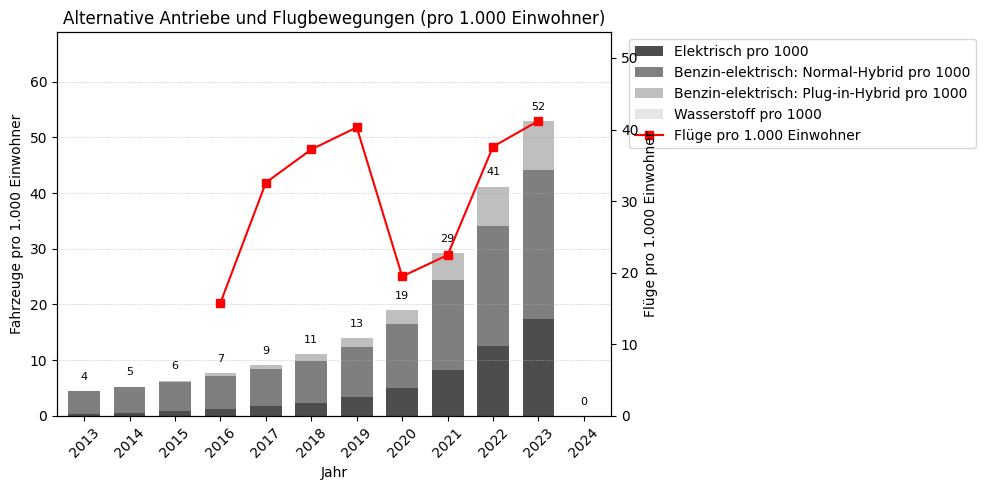

In [62]:
# Prepare data
df_ibcs = df_overall_normalized[[
    'year',
    'Elektrisch pro 1000',
    'Benzin-elektrisch: Normal-Hybrid pro 1000',
    'Benzin-elektrisch: Plug-in-Hybrid pro 1000',
    'Wasserstoff pro 1000',
    'Flüge gesamt pro 1000'
]].copy()

df_ibcs['year'] = df_ibcs['year'].astype(int)
df_ibcs.set_index('year', inplace=True)

stacked_alt = df_ibcs[[
    'Elektrisch pro 1000',
    'Benzin-elektrisch: Normal-Hybrid pro 1000',
    'Benzin-elektrisch: Plug-in-Hybrid pro 1000',
    'Wasserstoff pro 1000'
]]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart
bar_container = stacked_alt.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=['#4D4D4D', '#7F7F7F', '#BFBFBF', '#E6E6E6'],
    width=0.7
)


# Totals labeling via bars
for idx, year in enumerate(stacked_alt.index):
    total = stacked_alt.iloc[idx].sum()
    ax1.text(idx, total + 2, f"{int(total)}", ha='center', fontsize=8)

# Secondary axis for flight movements
ax2 = ax1.twinx()

# Get years as numerical positions from xticks
x_positions = [bar.get_x() + bar.get_width() / 2 for bar in bar_container.patches[:len(stacked_alt)]]

ax2.plot(
    x_positions,
    df_ibcs['Flüge gesamt pro 1000'],
    color='red',
    linestyle='-',
    marker='s',
    label='Flüge pro 1.000 Einwohner'
)

# Axis title & formatting
ax1.set_title("Alternative Antriebe und Flugbewegungen (pro 1.000 Einwohner)", fontsize=12)
ax1.set_xlabel("Jahr")
ax1.set_ylabel("Fahrzeuge pro 1.000 Einwohner")
ax2.set_ylabel("Flüge pro 1.000 Einwohner")

ax1.set_ylim(0, stacked_alt.sum(axis=1).max() * 1.3)
ax2.set_ylim(0, df_ibcs['Flüge gesamt pro 1000'].max() * 1.3)

ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))

# Name X ticks correctly
ax1.set_xticks(range(len(df_ibcs.index)))
ax1.set_xticklabels(df_ibcs.index, rotation=45)

# Combine keys
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.02, 1.0))

# Grid and layout
ax1.grid(axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

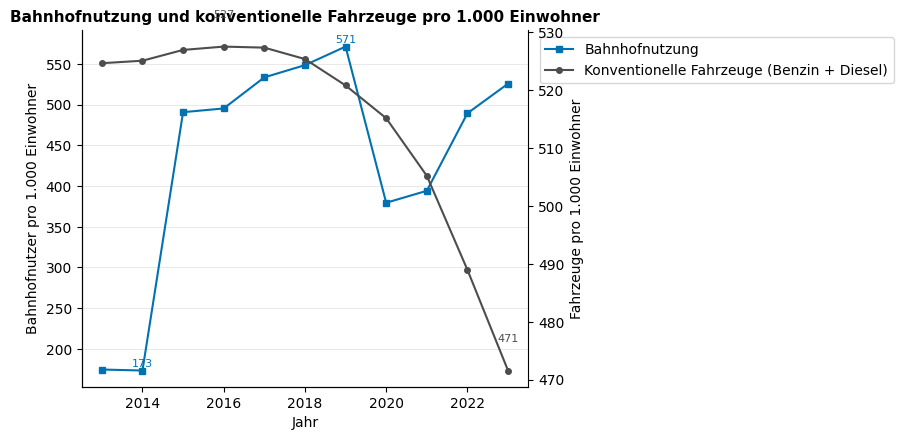

In [64]:
# Set year as index and filter for period 2013-2024
df_overall_normalized['year'] = df_overall_normalized['year'].astype(int)
df_plot = df_overall_normalized.set_index('year')
df_plot = df_plot.loc[(df_plot.index >= 2013) & (df_plot.index <= 2024)]

# Calculate lines
conv_line = df_plot['Benzin pro 1000'] + df_plot['Diesel pro 1000']
rail_usage = df_plot['Bahnhofbenutzer pro 1000']

# Start plot
fig, ax = plt.subplots(figsize=(9, 4.5))

# Station use (left axis)
ax.plot(df_plot.index, rail_usage, color='#0072B2', linestyle='-', marker='s', markersize=4,
        label='Bahnhofnutzung')
ax.text(rail_usage.idxmin(), rail_usage.min() + 5, f"{int(rail_usage.min())}", fontsize=8, ha='center', color='#0072B2')
ax.text(rail_usage.idxmax(), rail_usage.max() + 5, f"{int(rail_usage.max())}", fontsize=8, ha='center', color='#0072B2')

# Conventional vehicles (right-hand axle)
ax2 = ax.twinx()
ax2.plot(df_plot.index, conv_line, color='#4D4D4D', linestyle='-', marker='o', markersize=4,
         label='Konventionelle Fahrzeuge (Benzin + Diesel)')
ax2.text(conv_line.idxmin(), conv_line.min() + 5, f"{int(conv_line.min())}", fontsize=8, ha='center', color='#4D4D4D')
ax2.text(conv_line.idxmax(), conv_line.max() + 5, f"{int(conv_line.max())}", fontsize=8, ha='center', color='#4D4D4D')

# Axis title & layout
ax.set_title("Bahnhofnutzung und konventionelle Fahrzeuge pro 1.000 Einwohner", fontsize=11, weight='bold')
ax.set_xlabel("Jahr", fontsize=10)
ax.set_ylabel("Bahnhofnutzer pro 1.000 Einwohner", fontsize=10)
ax2.set_ylabel("Fahrzeuge pro 1.000 Einwohner", fontsize=10)

ax.grid(axis='y', linestyle='-', linewidth=0.4, color='#D9D9D9')
ax2.grid(False)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))

# Customize frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Combine key
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.01, 1))

plt.tight_layout()
plt.show()

**Anmerkung:** Der extrem niedrige Wert für die Bahnhofnutzung im Jahr 2014 ist vermutlich auf einen fehlerhaften oder unvollständigen Datensatz zurückzuführen. Im Vergleich zu den Vorjahren und dem sprunghaften Anstieg ab 2015 wirkt dieser Wert inkonsistent und deutet auf eine methodische oder technische Erfassungsabweichung hin.

# Schritt 5: Entscheiden

Im Folgenden werden die zentralen Fragestellungen dieser Analyse systematisch beantwortet.

## 5.1 Beantwortung Hauptfrage:
**Wie hat sich die Mobilität in der Schweiz im Zeitraum von 2013 bis 2023 pro 1.000 Einwohner entwickelt?**

Die Anzahl der Fahrzeuge mit alternativen Antriebsarten pro 1.000 Einwohner hat seit 2016 deutlich zugenommen. Besonders Elektrofahrzeuge zeigen ein starkes, teils exponentielles Wachstum. Auch Hybridfahrzeuge – sowohl Plug-in als auch Normal-Hybride – tragen zunehmend zur Elektrifizierung des Fahrzeugbestands bei.

Parallel dazu ist die Zahl der konventionell betriebenen Fahrzeuge (Benzin/Diesel) pro 1.000 Einwohner seit 2018 rückläufig. Der Rückgang verstärkt sich insbesondere ab 2021 und deutet auf eine strukturelle Veränderung im Fahrzeugmarkt hin. Bemerkenswert ist, dass zwischen 2013 und 2023 der Anteil konventioneller Fahrzeuge pro 1.000 Einwohner um rund 10,1 % sank – bei gleichzeitigem Bevölkerungswachstum von ebenfalls etwa 10 %. Dies zeigt, dass die Zahl konventioneller Fahrzeuge nicht nur relativ, sondern auch in Relation zum Bevölkerungswachstum abnimmt.

Die Nutzung des öffentlichen Verkehrs – gemessen an der Anzahl Bahnhofnutzer pro 1.000 Einwohner – zeigt zwischen 2014 und 2019 eine kontinuierliche Zunahme und erreicht 2019 ihren Höhepunkt. In den Jahren 2020 und 2021 kommt es pandemiebedingt zu einem deutlichen Einbruch. Ab 2022 steigt die Nutzung wieder merklich an, erreicht jedoch bis 2024 noch nicht das Vorkrisenniveau. Ein auffälliger Ausreisser im Jahr 2014 mit ungewöhnlich niedrigem Wert (~173 Nutzer pro 1.000 Einwohner) deutet auf einen möglichen Erfassungsfehler im Datensatz hin und sollte bei der Interpretation berücksichtigt werden.

### 5.1.1 Beantwortung Unterfrage 1
**Welcher alternative Antrieb verzeichnete im Verhältnis zur Bevölkerung das stärkste Wachstum zwischen 2013 und 2023?**
Die Analyse zeigt, dass Plug-in-Hybride im Zeitraum von 2013 bis 2023 prozentual das stärkste Wachstum unter den alternativen Antriebsarten aufweisen – mit einem Zuwachs von +69.311 % pro 1.000 Einwohner, allerdings ausgehend von einem sehr niedrigen Anfangswert. In absoluten Zahlen legten jedoch die Normal-Hybride mit einem Zuwachs von +22,7 Fahrzeugen pro 1.000 Einwohner am stärksten zu.

Auch rein elektrische Fahrzeuge verzeichneten ein starkes Wachstum: Der Anteil pro 1.000 Einwohner stieg um +17 Fahrzeuge, was einem prozentualen Anstieg von 5.164 % entspricht. Der anhaltende Zuwachs bei diesen alternativen Antriebsarten lässt sich unter anderem durch technologische Fortschritte, staatliche Förderprogramme sowie ein wachsendes Umweltbewusstsein in der Bevölkerung erklären.

### 5.1.2 Beantwortung Unterfrage 2
**Welche Auswirkungen hatte die Corona-Pandemie auf das Mobilitätsverhalten in der Luftfahrt – gemessen an Flugbewegungen pro 1.000 Einwohner?**
Die Anzahl der Flugbewegungen pro 1.000 Einwohner zeigt im Zeitraum von 2013 bis 2023 deutliche Schwankungen. Ab dem Jahr 2020 hatte die Corona-Pandemie massive Auswirkungen auf das Mobilitätsverhalten im Luftverkehr: Die Zahl der Flugbewegungen sank zwischen 2019 und 2021 drastisch – als unmittelbare Folge der weltweiten Reisebeschränkungen. Ab 2022 ist eine deutliche Erholung erkennbar, wobei das Vorkrisenniveau von 2019 bis einschliesslich 2023 noch nicht vollständig erreicht wurde.

Diese Entwicklung unterstreicht die hohe Krisenanfälligkeit des Luftverkehrs und verdeutlicht zugleich, dass sich Mobilitätsverhalten in Ausnahmesituationen schnell und tiefgreifend verändern kann. Sie zeigt auch, dass Erholungstendenzen zwar einsetzen, aber nicht automatisch zu einer vollständigen Rückkehr zur Ausgangssituation führen.

### 5.1.3 Beantwortung Unterfrage 3
**Wie stark sank der Anteil konventionell betriebener Fahrzeuge in Relation zum Bevölkerungswachstum?**
Obwohl Fahrzeuge mit Benzin- und Dieselmotoren weiterhin den grössten Anteil im Fahrzeugbestand ausmachen, ist deren Zahl pro 1.000 Einwohner seit mehreren Jahren rückläufig. Zwischen 2013 und 2023 sank der Anteil konventioneller Fahrzeuge pro 1.000 Einwohner um 10,1 %, während die Bevölkerung im selben Zeitraum um ebenfalls rund 10,1 % zunahm.

Das bedeutet, dass das Wachstum der Bevölkerung nicht mehr mit einem Anstieg konventioneller Fahrzeuge einhergeht. Im Gegenteil: Die Zahl dieser Fahrzeuge nimmt nicht nur relativ, sondern auch in direkter Relation zur Bevölkerungsentwicklung ab. Dies weist auf einen strukturellen Wandel im Fahrzeugmarkt hin. Der relative Anteil fossiler Antriebe sinkt zugunsten elektrischer und hybrider Technologien. Besonders ab dem Jahr 2019 ist eine zunehmende Verdrängung konventioneller Fahrzeuge durch alternative Antriebe zu beobachten (siehe Unterfrage 1).

### 5.1.4 Beantwortung Unterfrage 4
**Welche Rückschlüsse lassen sich aus diesen Entwicklungen für eine nachhaltige Mobilitätsstrategie in der Schweiz ziehen?**
Die Ergebnisse zeigen, dass bestehende Fördermassnahmen für alternative Antriebe im Strassenverkehr Wirkung entfalten – insbesondere bei der Elektrifizierung des Fahrzeugbestands. Dieses Momentum sollte durch gezielte Massnahmen weiter gestärkt werden, z. B. durch den flächendeckenden Ausbau der Ladeinfrastruktur, steuerliche Anreize für emissionsarme Fahrzeuge sowie die Einbindung schwer dekarbonisierbarer Segmente wie der Güterverkehr.

Gleichzeitig wird deutlich, dass eine nachhaltige Mobilitätsstrategie verkehrsträgerübergreifend ausgerichtet sein muss. Auch die Nutzung des öffentlichen Verkehrs – etwa die Entwicklung der Bahnhofnutzung – muss dabei stärker in den Fokus rücken. Zudem sollte der Luftverkehr im Sinne einer ganzheitlichen Betrachtung adressiert werden, etwa durch eine Verlagerung auf den Schienenverkehr bei Kurzstreckenflügen (z. B. Nachtzüge).

Ein weiterer Schlüssel liegt in der Stärkung datenbasierter Steuerungsfähigkeit: Der Aufbau eines integrierten, nationalen Mobilitätsmonitorings würde es ermöglichen, sektorübergreifende Trends frühzeitig zu erkennen und evidenzbasierte Massnahmen abzuleiten. Dies erfordert auch eine bessere Verzahnung bestehender Datenquellen sowie die Förderung wissenschaftlicher Begleitforschung (z. B. durch ARE, BAZL, BFE).

Eine resiliente und klimafreundliche Mobilität der Zukunft braucht also nicht nur technologische Innovation – sondern auch klare strategische Steuerung, Intermodalität und datenbasierte Governance.


## 5.2 Handlungsempfehlungen aus Sicht des Bundes

Die vorliegenden Analysen zeigen: Die Schweizer Mobilität befindet sich im strukturellen Wandel. Alternative Antriebsformen – insbesondere rein elektrische und hybride Fahrzeuge – haben seit 2016 massiv an Bedeutung gewonnen. Gleichzeitig geht der Bestand konventionell betriebener Fahrzeuge pro 1.000 Einwohner zurück, obwohl die Bevölkerung weiter wächst. Auch das Mobilitätsverhalten im öffentlichen Verkehr und der Luftfahrt unterliegt starken Schwankungen, insbesondere durch externe Einflüsse wie die Corona-Pandemie.

Auf dieser Grundlage ergeben sich folgende strategische Empfehlungen für eine zukunftsorientierte, nachhaltige Verkehrspolitik:

**	1. Transformation zu alternativen Antrieben beschleunigen:**
Bestehende Förderinstrumente für Elektro-, Hybrid- und Wasserstofffahrzeuge sollten gezielt weiterentwickelt werden. Besondere Aufmerksamkeit gilt dabei schwer dekarbonisierbaren Bereichen wie dem Güterverkehr, dem Langstreckenpendelverkehr sowie strukturschwachen ländlichen Regionen. Auch der rasche Ausbau der Ladeinfrastruktur sowie technologieoffene Förderansätze (z. B. Wasserstoff, synthetische Kraftstoffe) sind zu forcieren.

**	2. Öffentlichen Verkehr gezielt stärken und integrieren:**
Die Rückkehr zur Vorkrisennutzung der Bahnhöfe seit 2022 zeigt, dass der öffentliche Verkehr weiter Rückgrat der Verkehrswende bleiben kann. Der Bund sollte mit gezielten Investitionen (z. B. Angebotserweiterung, Tarifintegration, Zugang in Randregionen) diese Entwicklung verstetigen. Zudem sollte eine bessere intermodale Vernetzung zwischen Individualverkehr, ÖV und Langstreckenmobilität (z. B. durch Mobility Hubs) etabliert werden.

**3. Luftverkehr nachhaltig transformieren:**
Die starke Erholungsdynamik im Flugverkehr nach der Pandemie zeigt einerseits die Widerstandsfähigkeit, andererseits die Klimarelevanz dieses Sektors. Der Bund sollte hier gezielt gegensteuern – etwa durch eine konsequente Förderung von Alternativen zu Kurzstreckenflügen (z. B. Nachtzüge im internationalen Personenverkehr).

**4. Integriertes Mobilitätsmonitoring und Governance etablieren:**

Zur faktenbasierten Steuerung braucht es ein nationales, standardisiertes Mobilitätsmonitoring über alle Verkehrsträger hinweg. Datenbasierte Indikatoren (z. B. Mobilitätsverhalten pro 1.000 Einwohner) sollten systematisch erhoben, öffentlich verfügbar gemacht und in die strategische Verkehrsplanung integriert werden. Dies erfordert eine bessere institutionelle Zusammenarbeit von Bund (ARE, BAZL, BFE), Kantonen und Forschung.

**Fazit**
Mit diesen Massnahmen kann der Bund die Weichen für eine resiliente, datenbasierte und klimakompatible Mobilität stellen. Der Wandel ist längst im Gang – jetzt gilt es, ihn intelligent und sozial ausgewogen zu gestalten.

## Limitationen und Datenanalyse

Trotz der aufschlussreichen Erkenntnisse sind mehrere Einschränkungen der vorliegenden Analyse zu beachten:


*   **Datenlücken und Unstetigkeiten:** Für einzelne Jahre (z. B. Bahnhofnutzung 2014 oder Flugbewegungen 2024) liegen unplausible Ausreisser oder noch keine validierten Zahlen vor. Diese wurden, soweit möglich, identifiziert und kommentiert, könnten aber das Gesamtbild verzerren.
*   **Unterschiedliche Quellen und Granularität:** Die Datensätze stammen aus verschiedenen Erhebungen mit teils unterschiedlicher Methodik und Erfassungslogik (z. B. nationale vs. kantonale Ebene, Stichtagsdaten vs. Jahresmittelwerte), was die Vergleichbarkeit einschränken kann.
*   **Keine Differenzierung nach Nutzergruppen oder Regionen:** Aussagen erfolgen auf aggregierter nationaler Ebene pro 1.000 Einwohner – regionale Unterschiede, Alter, sozioökonomischer Hintergrund oder Mobilitätszwecke (z. B. Freizeit vs. Beruf) werden nicht berücksichtigt.
*   **Verzögerung bei der Datenverfügbarkeit:** Die aktuellsten verfügbaren Daten enden zumeist im Jahr 2023. Entwicklungen im Jahr 2024 oder laufende politische Massnahmen sind daher nur eingeschränkt abbildbar.


Diese Limitationen unterstreichen die Notwendigkeit, ein nationales, kontinuierliches und qualitativ hochwertiges Mobilitätsmonitoring aufzubauen, um fundierte politische Entscheidungen treffen zu können.

# 6. Literaturverzeichnis

Es wurden lediglich Unterlagen und Dokumentationen aus dem Unterricht verwedent.

# 7. Verwendete Hilfsmittel

Neben dem Literaturverzeichnis und den Unteralgen im Unterricht, kamen für die Erstellung dieser Arbeit folgende Hilfsmittel zum Einsatz:


*   **ChatGPT **zur sprachlichen Überprüfung (Rechtschreibung, Stil, Einheitlichkeit) sowie zur Verbesserung von Code-Abschnitten.




# Ende des Notebooks

%%